# Optimizer

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
import torch.optim as optim
import torch.nn as nn
from torchvision.transforms import *
from torch.utils.data import DataLoader
import torch
import numpy as np
from collections import namedtuple
import pandas as pd

def train(dataloader, model, criterion, optimizer, scheduler, num_epochs=20):
    results = []
    for epoch in range(num_epochs):
        optimizer.step()
        scheduler.step()
        model.train()

        running_loss = 0.0
        running_corrects = 0

        n = 0
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            n += len(labels)

        epoch_loss = running_loss / float(n)
        epoch_acc = running_corrects.double() / float(n)

        print(f'epoch {epoch}/{num_epochs} : {epoch_loss:.5f}, {epoch_acc:.5f}')
        results.append(EpochProgress(epoch, epoch_loss, epoch_acc.item()))
    return pd.DataFrame(results)

def plot_results(df, figsize=(10, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss', color='tab:red')
    ax1.plot(df['epoch'], df['loss'], color='tab:red')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('accuracy', color='tab:blue')
    ax2.plot(df['epoch'], df['accuracy'], color='tab:blue')
    
    fig.tight_layout()

np.random.seed(37)
torch.manual_seed(37)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

num_classes = 3
pretrained = True
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

EpochProgress = namedtuple('EpochProgress', 'epoch, loss, accuracy')

transform = transforms.Compose([Resize(224), ToTensor()])
image_folder = datasets.ImageFolder('./shapes/train', transform=transform)
dataloader = DataLoader(image_folder, batch_size=4, shuffle=True, num_workers=4)

## Stochastic gradient descent

epoch 0/20 : 1.35156, 0.40000
epoch 1/20 : 1.13637, 0.43333
epoch 2/20 : 1.06040, 0.50000
epoch 3/20 : 1.02444, 0.56667
epoch 4/20 : 1.13440, 0.33333
epoch 5/20 : 1.08239, 0.56667
epoch 6/20 : 1.08502, 0.53333
epoch 7/20 : 1.08369, 0.43333
epoch 8/20 : 1.06111, 0.46667
epoch 9/20 : 1.09906, 0.43333
epoch 10/20 : 1.09626, 0.43333
epoch 11/20 : 1.07304, 0.50000
epoch 12/20 : 1.11257, 0.43333
epoch 13/20 : 1.14465, 0.50000
epoch 14/20 : 1.09183, 0.53333
epoch 15/20 : 1.07681, 0.56667
epoch 16/20 : 1.10339, 0.53333
epoch 17/20 : 1.13121, 0.43333
epoch 18/20 : 1.11461, 0.43333
epoch 19/20 : 1.06282, 0.56667


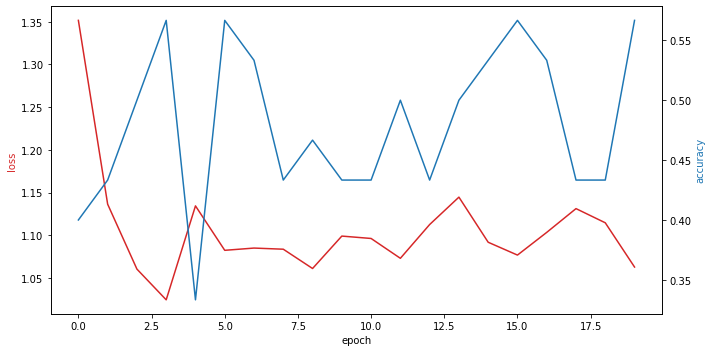

In [2]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## AdaDelta

epoch 0/20 : 1.19977, 0.33333
epoch 1/20 : 1.19553, 0.40000
epoch 2/20 : 1.18889, 0.36667
epoch 3/20 : 1.15373, 0.33333
epoch 4/20 : 1.19890, 0.40000
epoch 5/20 : 1.16365, 0.36667
epoch 6/20 : 1.16017, 0.36667
epoch 7/20 : 1.14592, 0.36667
epoch 8/20 : 1.16320, 0.43333
epoch 9/20 : 1.19652, 0.36667
epoch 10/20 : 1.18728, 0.33333
epoch 11/20 : 1.18054, 0.36667
epoch 12/20 : 1.21949, 0.33333
epoch 13/20 : 1.16084, 0.40000
epoch 14/20 : 1.15557, 0.36667
epoch 15/20 : 1.17068, 0.36667
epoch 16/20 : 1.14629, 0.33333
epoch 17/20 : 1.12268, 0.43333
epoch 18/20 : 1.17228, 0.36667
epoch 19/20 : 1.14354, 0.36667


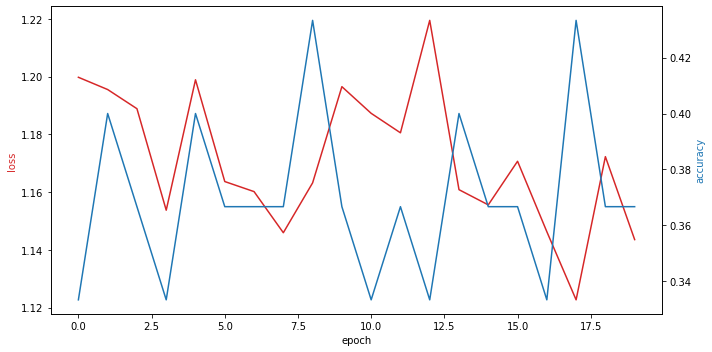

In [3]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## AdaGrad

epoch 0/20 : 0.77216, 0.66667
epoch 1/20 : 0.78004, 0.73333
epoch 2/20 : 0.57943, 0.76667
epoch 3/20 : 0.21080, 0.96667
epoch 4/20 : 0.28196, 0.90000
epoch 5/20 : 0.34823, 0.90000
epoch 6/20 : 0.23991, 0.93333
epoch 7/20 : 0.36666, 0.86667
epoch 8/20 : 0.34647, 0.86667
epoch 9/20 : 0.53740, 0.70000
epoch 10/20 : 0.25844, 0.86667
epoch 11/20 : 0.37599, 0.83333
epoch 12/20 : 0.51929, 0.73333
epoch 13/20 : 0.55198, 0.76667
epoch 14/20 : 0.39852, 0.80000
epoch 15/20 : 0.32558, 0.86667
epoch 16/20 : 0.71763, 0.83333
epoch 17/20 : 0.45249, 0.80000
epoch 18/20 : 0.39796, 0.83333
epoch 19/20 : 0.50014, 0.76667


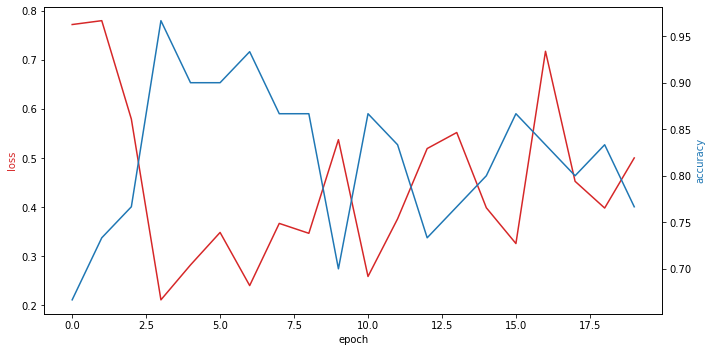

In [4]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## Adam

epoch 0/20 : 1.08423, 0.60000
epoch 1/20 : 1.63394, 0.53333
epoch 2/20 : 0.49516, 0.76667
epoch 3/20 : 0.60868, 0.76667
epoch 4/20 : 0.57865, 0.83333
epoch 5/20 : 0.60903, 0.76667
epoch 6/20 : 0.54606, 0.80000
epoch 7/20 : 0.38538, 0.86667
epoch 8/20 : 0.81709, 0.73333
epoch 9/20 : 0.41252, 0.83333
epoch 10/20 : 0.39877, 0.90000
epoch 11/20 : 0.58696, 0.76667
epoch 12/20 : 0.52193, 0.73333
epoch 13/20 : 0.42973, 0.76667
epoch 14/20 : 0.31566, 0.90000
epoch 15/20 : 0.64462, 0.66667
epoch 16/20 : 0.61575, 0.70000
epoch 17/20 : 0.40781, 0.83333
epoch 18/20 : 0.57845, 0.83333
epoch 19/20 : 0.75139, 0.73333


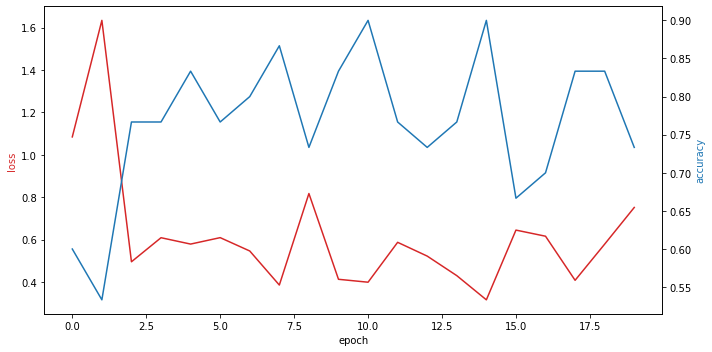

In [5]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## Adamw

epoch 0/20 : 1.16534, 0.60000
epoch 1/20 : 0.83021, 0.70000
epoch 2/20 : 0.56983, 0.80000
epoch 3/20 : 0.54591, 0.83333
epoch 4/20 : 0.65391, 0.73333
epoch 5/20 : 0.42384, 0.86667
epoch 6/20 : 0.43772, 0.83333
epoch 7/20 : 0.33034, 0.86667
epoch 8/20 : 0.57162, 0.73333
epoch 9/20 : 0.58920, 0.76667
epoch 10/20 : 0.59165, 0.83333
epoch 11/20 : 0.58105, 0.80000
epoch 12/20 : 0.48469, 0.80000
epoch 13/20 : 0.52863, 0.86667
epoch 14/20 : 0.68455, 0.80000
epoch 15/20 : 0.90342, 0.70000
epoch 16/20 : 0.58743, 0.80000
epoch 17/20 : 0.89801, 0.66667
epoch 18/20 : 0.30146, 0.86667
epoch 19/20 : 0.39773, 0.83333


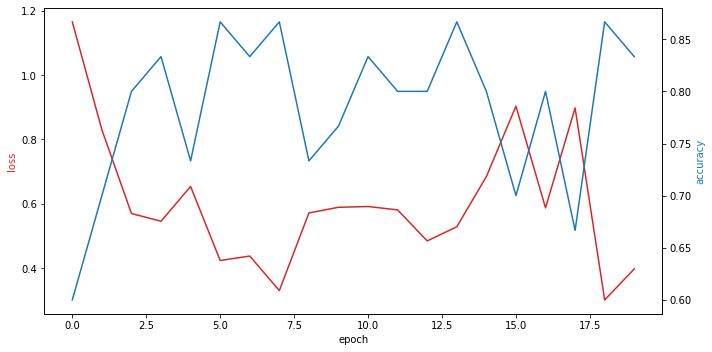

In [6]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## Adamax

epoch 0/20 : 1.05041, 0.56667
epoch 1/20 : 1.25037, 0.70000
epoch 2/20 : 0.89263, 0.83333
epoch 3/20 : 1.09394, 0.66667
epoch 4/20 : 1.38519, 0.66667
epoch 5/20 : 0.80390, 0.70000
epoch 6/20 : 0.81821, 0.76667
epoch 7/20 : 1.03320, 0.66667
epoch 8/20 : 0.69888, 0.83333
epoch 9/20 : 0.94823, 0.76667
epoch 10/20 : 1.13064, 0.70000
epoch 11/20 : 1.17754, 0.70000
epoch 12/20 : 0.87697, 0.80000
epoch 13/20 : 0.84306, 0.83333
epoch 14/20 : 1.26252, 0.63333
epoch 15/20 : 0.92927, 0.73333
epoch 16/20 : 0.85536, 0.76667
epoch 17/20 : 0.99645, 0.73333
epoch 18/20 : 0.91567, 0.70000
epoch 19/20 : 1.01903, 0.63333


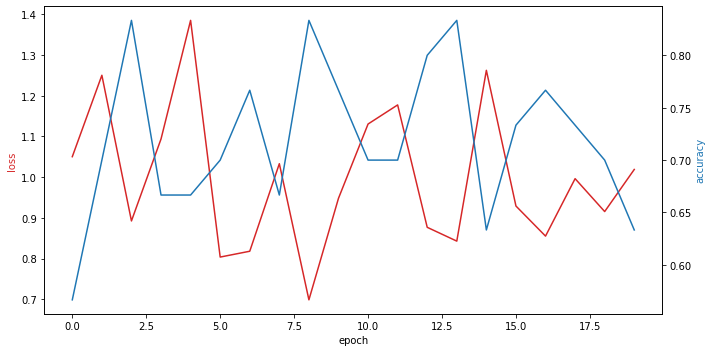

In [7]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## ASGD

epoch 0/20 : 1.17415, 0.40000
epoch 1/20 : 1.02151, 0.53333
epoch 2/20 : 0.95373, 0.56667
epoch 3/20 : 1.01674, 0.50000
epoch 4/20 : 0.91915, 0.66667
epoch 5/20 : 0.95214, 0.50000
epoch 6/20 : 0.97350, 0.56667
epoch 7/20 : 1.00653, 0.53333
epoch 8/20 : 0.93291, 0.56667
epoch 9/20 : 1.02682, 0.50000
epoch 10/20 : 0.94823, 0.53333
epoch 11/20 : 0.96903, 0.46667
epoch 12/20 : 0.95601, 0.63333
epoch 13/20 : 0.97117, 0.50000
epoch 14/20 : 0.89461, 0.63333
epoch 15/20 : 0.95025, 0.53333
epoch 16/20 : 0.96510, 0.60000
epoch 17/20 : 1.01499, 0.43333
epoch 18/20 : 0.95498, 0.50000
epoch 19/20 : 0.98825, 0.63333


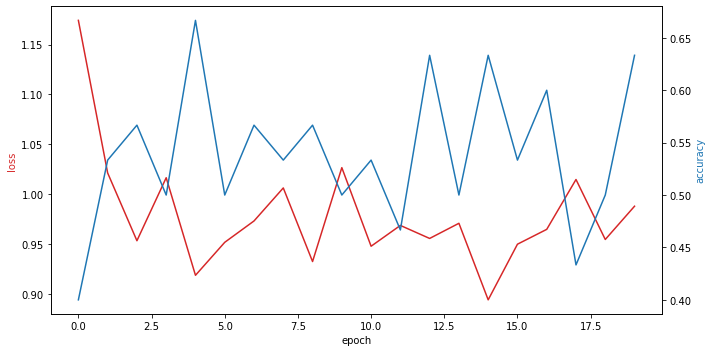

In [8]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.ASGD(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## RMSprop

epoch 0/20 : 2.38401, 0.36667
epoch 1/20 : 3.06042, 0.43333
epoch 2/20 : 2.37027, 0.43333
epoch 3/20 : 2.27388, 0.50000
epoch 4/20 : 2.42956, 0.43333
epoch 5/20 : 2.28123, 0.46667
epoch 6/20 : 2.32184, 0.46667
epoch 7/20 : 2.07055, 0.56667
epoch 8/20 : 2.22991, 0.50000
epoch 9/20 : 2.06145, 0.50000
epoch 10/20 : 2.68841, 0.40000
epoch 11/20 : 2.19093, 0.50000
epoch 12/20 : 2.10353, 0.50000
epoch 13/20 : 2.06072, 0.53333
epoch 14/20 : 2.31504, 0.40000
epoch 15/20 : 2.37040, 0.40000
epoch 16/20 : 2.16376, 0.46667
epoch 17/20 : 2.37319, 0.53333
epoch 18/20 : 2.35661, 0.43333
epoch 19/20 : 2.22608, 0.46667


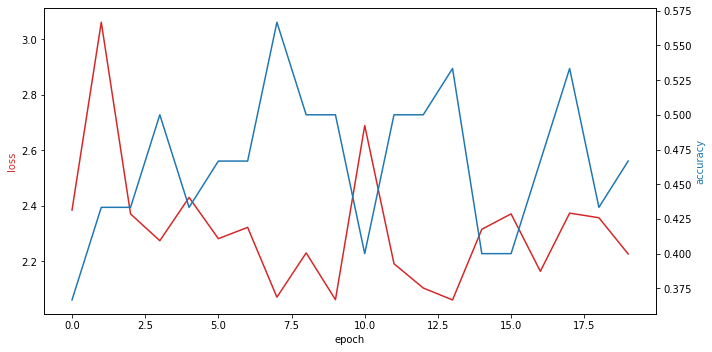

In [9]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## Rprop

epoch 0/20 : 1.41951, 0.43333
epoch 1/20 : 1.00923, 0.63333
epoch 2/20 : 0.27935, 0.93333
epoch 3/20 : 0.47481, 0.83333
epoch 4/20 : 0.06080, 0.96667
epoch 5/20 : 0.49697, 0.86667
epoch 6/20 : 0.33636, 0.86667
epoch 7/20 : 0.15372, 0.96667
epoch 8/20 : 0.05433, 1.00000
epoch 9/20 : 0.00329, 1.00000
epoch 10/20 : 0.05734, 0.96667
epoch 11/20 : 0.07089, 0.96667
epoch 12/20 : 0.03279, 1.00000
epoch 13/20 : 0.04594, 0.96667
epoch 14/20 : 0.05307, 0.96667
epoch 15/20 : 0.01468, 1.00000
epoch 16/20 : 0.06959, 0.96667
epoch 17/20 : 0.04229, 0.96667
epoch 18/20 : 0.07761, 0.96667
epoch 19/20 : 0.00851, 1.00000


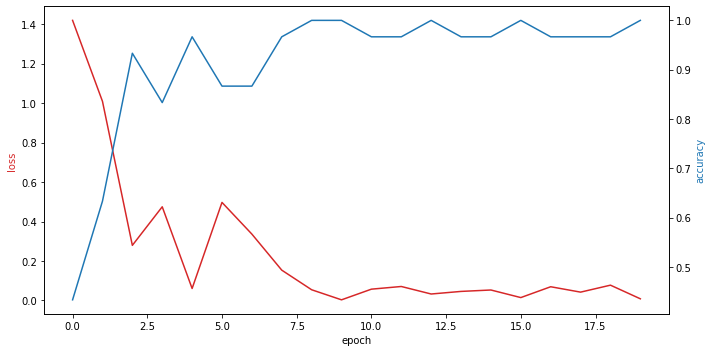

In [10]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Rprop(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)